x_train (60000, 28, 28)
y_train (60000,)
y_train {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
x_test (10000, 28, 28)
y_test (10000,)
y_test {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


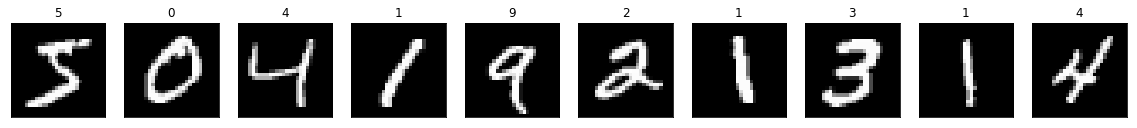

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("y_train", set(y_train))

print("x_test", x_test.shape)
print("y_test", y_test.shape)
print("y_test", set(y_test))

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title(y_train[i])
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Simple Autoencoder

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as k

epochs = 50
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.3680 - val_loss: 0.2714
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2640 - val_loss: 0.2530
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2429 - val_loss: 0.2307
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2234 - val_loss: 0.2137
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2090 - val_loss: 0.2017
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1986 - val_loss: 0.1928
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1904 - val_loss: 0.1853
Epoch 8/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1836 - val_loss: 0.1790
Epoch 9/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1775 - val_loss: 0.1734
Epoch

In [5]:
# encoder.save("models/simple_encoder.h5")
# decoder.save("models/simple_decoder.h5")
# autoencoder.save("models/simple_autoencoder.h5")

In [6]:
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


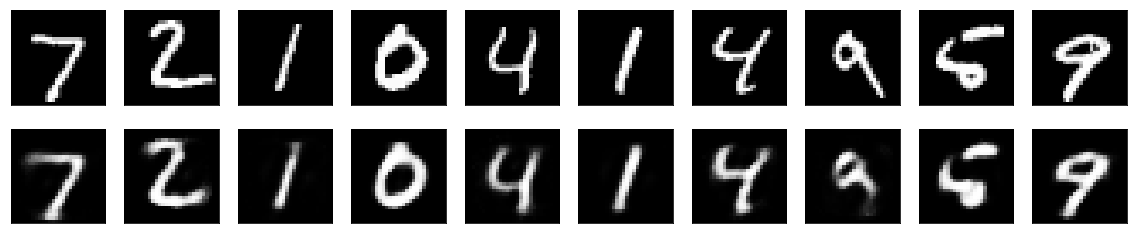

In [7]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep Autoencoder

In [8]:
import keras.layers

epochs = 50
encoding_dim = 32

input_img = Input(shape=(784,))
decoder_input = Input(shape=(encoding_dim,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

encoder_model = Model(input_img, encoded)


decoder = decoder_input

layer = Dense(64, activation='relu')
decoded = layer(encoded)
decoder = layer(decoder)

layer = Dense(128, activation='relu')
decoded = layer(decoded)
decoder = layer(decoder)

layer = Dense(784, activation='sigmoid')
decoded = layer(decoded)
decoder = layer(decoder)

decoder_model = Model(decoder_input, decoder)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.3412 - val_loss: 0.2659
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2556 - val_loss: 0.2464
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2357 - val_loss: 0.2238
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2151 - val_loss: 0.2066
Epoch 5/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2024 - val_loss: 0.1955
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1908 - val_loss: 0.1834
Epoch 7/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1822 - val_loss: 0.1768
Epoch 8/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1755 - val_loss: 0.1695
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1698 - val_loss: 0.1658
Epoch

In [9]:
# encoder_model.save("models/deep_encoder.h5")
# decoder_model.save("models/deep_decoder.h5")
# autoencoder.save("models/deep_autoencoder.h5")

In [10]:
encoded_imgs = encoder_model.predict(x_test)
print(encoded_imgs.shape)
decoded_imgs = decoder_model.predict(encoded_imgs)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


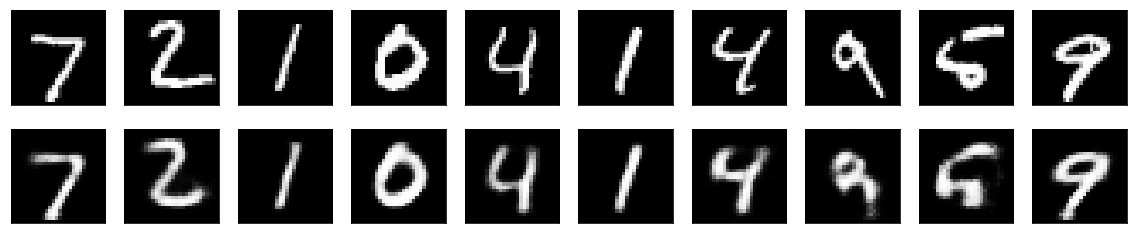

In [11]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()